In [1]:
!kaggle datasets download -d victorpicinin/gta-san-andreas-driving-dataset-with-label


Dataset URL: https://www.kaggle.com/datasets/victorpicinin/gta-san-andreas-driving-dataset-with-label
License(s): other
100% 3.78G/3.78G [02:57<00:00, 23.8MB/s]
100% 3.78G/3.78G [02:57<00:00, 22.9MB/s]


In [2]:
!unzip gta-san-andreas-driving-dataset-with-label.zip


Streaming output truncated to the last 5000 lines.
  inflating: GTA_SanAndreasDriving/screenshots/1648_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1649_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/164_1010.png  
  inflating: GTA_SanAndreasDriving/screenshots/1650_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1651_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1652_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1653_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1654_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1655_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1656_1010.png  
  inflating: GTA_SanAndreasDriving/screenshots/1657_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1658_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/1659_1000.png  
  inflating: GTA_SanAndreasDriving/screenshots/165_1010.png  
  inflating: GTA_SanAndreasDriving/screenshots/1660_1000.png  
  infl

In [3]:
import os
import pandas as pd

# Define image directory
image_dir = "/content/GTA_SanAndreasDriving/screenshots"  # Adjust this path to your dataset

image_filenames = []
labels = []

for img_name in os.listdir(image_dir):
    if "_" in img_name:  # Ensure the format is correct
        # Split the filename at "_" to separate ID and WSAD label
        parts = img_name.split("_")
        if len(parts) == 2:
            label = parts[1].split(".")[0]  # Remove the file extension
            image_filenames.append(img_name)
            labels.append(label)


labels_df = pd.DataFrame({"image_name": image_filenames, "label": labels})

print(labels_df.head())

print(labels_df['label'].value_counts())


      image_name label
0  4862_0010.png  0010
1  1206_1000.png  1000
2  4525_1000.png  1000
3  4322_1001.png  1001
4  1952_1010.png  1010
label
1000    2806
1010     916
1001     788
0000     485
0010     331
0001     304
0110      37
0100      35
0101       5
1011       2
Name: count, dtype: int64


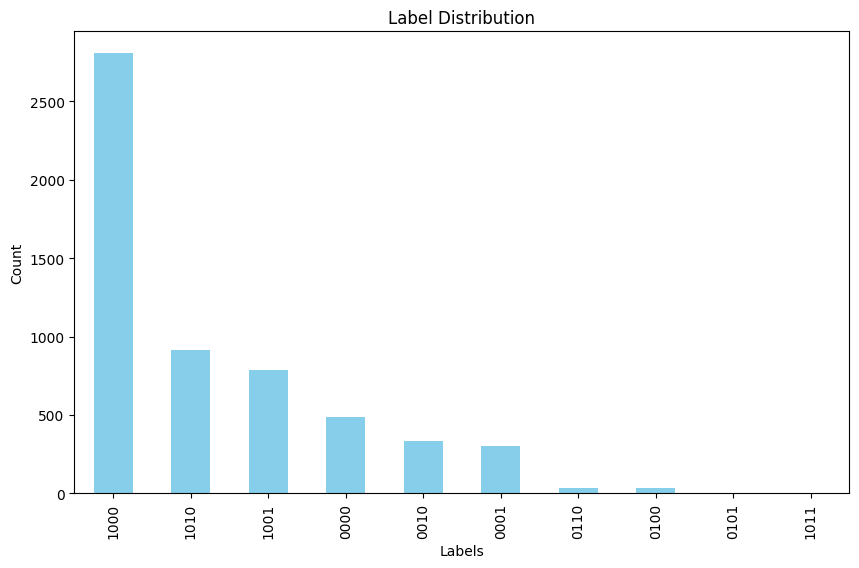

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
labels_df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()


In [5]:
max_count = labels_df['label'].value_counts().max()
min_count = labels_df['label'].value_counts().min()
imbalance_ratio = max_count / min_count
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 2:
    print("The dataset is imbalanced. Consider using data augmentation or oversampling.")
else:
    print("The dataset has a balanced label distribution.")


Imbalance ratio: 1403.00
The dataset is imbalanced. Consider using data augmentation or oversampling.


Images for Label: 0010


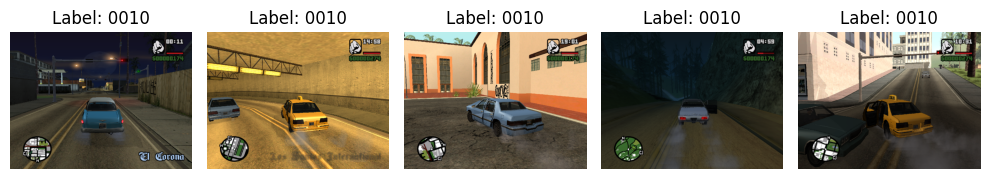

Images for Label: 1000


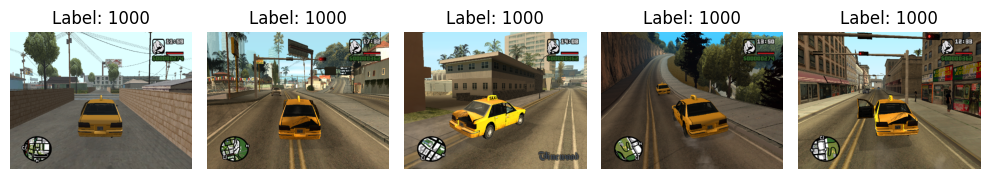

Images for Label: 1001


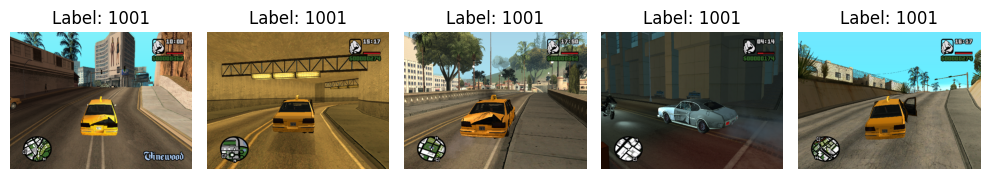

Images for Label: 1010


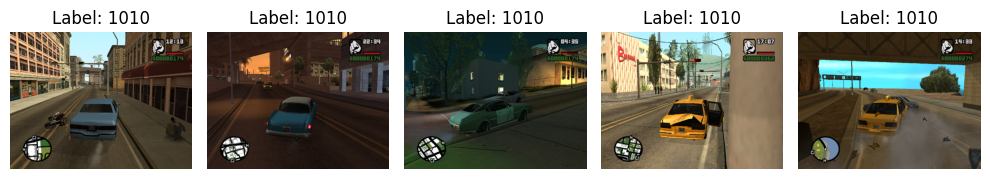

Images for Label: 0000


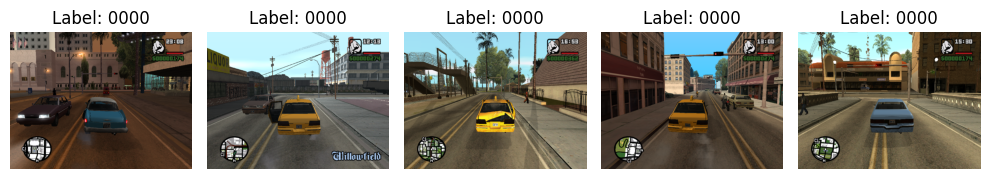

Images for Label: 0001


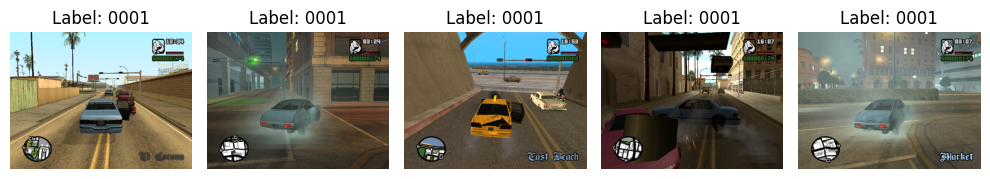

Images for Label: 0101


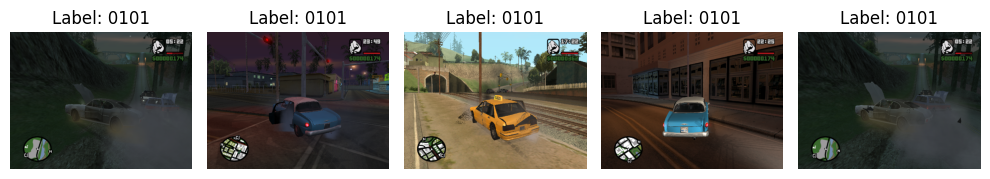

Images for Label: 0100


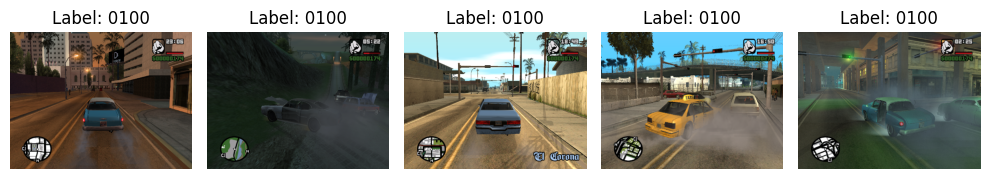

Images for Label: 0110


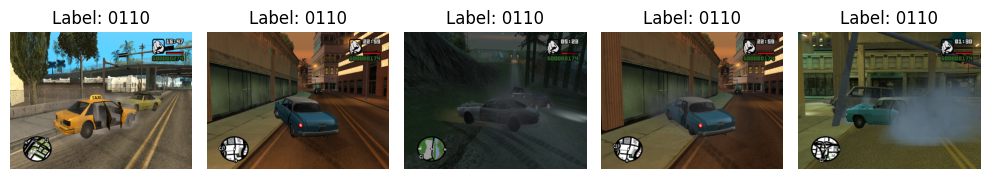

Images for Label: 1011


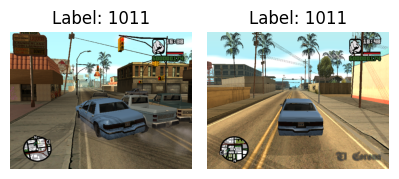

In [6]:
import cv2

def plot_images_for_label(label, num_images=5):
    samples = labels_df[labels_df['label'] == label].sample(min(num_images, len(labels_df[labels_df['label'] == label])))
    plt.figure(figsize=(10, 5))
    for i, row in enumerate(samples.iterrows()):
        img_path = os.path.join(image_dir, row[1]['image_name'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

for label in labels_df['label'].unique():
    print(f"Images for Label: {label}")
    plot_images_for_label(label)


In [7]:
from sklearn.utils import resample

# Get the count of samples for each class
class_counts = labels_df['label'].value_counts()

# Initialize an empty list to store resampled dataframes
resampled_dfs = []

# Process each class separately
for label in labels_df['label'].unique():
    class_data = labels_df[labels_df['label'] == label]
    original_count = len(class_data)

    if original_count < 200:
        # Create 800 additional samples
        additional_samples = resample(class_data,
                                   replace=True,
                                   n_samples=800,
                                   random_state=42)
        # Combine original samples with additional samples
        resampled_class = pd.concat([class_data, additional_samples])
    elif original_count < 500:
        # Create 200 additional samples
        additional_samples = resample(class_data,
                                   replace=True,
                                   n_samples=650,
                                   random_state=42)
        # Combine original samples with additional samples
        resampled_class = pd.concat([class_data, additional_samples])
    elif original_count < 1000:
        # Create 200 additional samples
        additional_samples = resample(class_data,
                                   replace=True,
                                   n_samples=500,
                                   random_state=42)
        # Combine original samples with additional samples
        resampled_class = pd.concat([class_data, additional_samples])
    else:
        # Keep original data for classes with 100 or more samples
        resampled_class = class_data

    resampled_dfs.append(resampled_class)

# Combine all classes
balanced_df = pd.concat(resampled_dfs)

# Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the distributions
print("Original class distribution:")
print(labels_df['label'].value_counts())
print("\nResampled class distribution:")
print(balanced_df['label'].value_counts())

Original class distribution:
label
1000    2806
1010     916
1001     788
0000     485
0010     331
0001     304
0110      37
0100      35
0101       5
1011       2
Name: count, dtype: int64

Resampled class distribution:
label
1000    2806
1010    1416
1001    1288
0000    1135
0010     981
0001     954
0110     837
0100     835
0101     805
1011     802
Name: count, dtype: int64


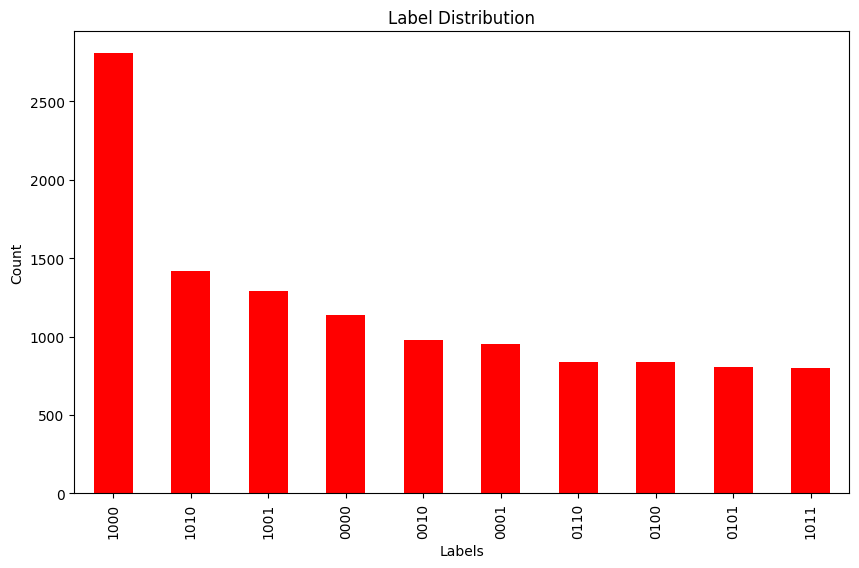

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
balanced_df['label'].value_counts().plot(kind='bar', color='red')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [9]:
from torchvision import transforms

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=(-20, 20)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Add separate transform for test data (without augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])

In [10]:
import torch
from PIL import Image
from sklearn.model_selection import train_test_split
import os  # Add this import for path handling


def load_data(df, image_dir, transform):
    images = []
    labels = []
    for _, row in df.iterrows():
        # Use os.path.join for better path handling
        img_path = os.path.join(image_dir, row['image_name'])

        # Add error handling for image loading
        try:
            image = Image.open(img_path).convert('RGB')
            image = transform(image)
            images.append(image)

            # Make sure the label conversion is appropriate for your case
            # If row['label'] is already a list/array of numbers, you might not need the list comprehension
            label = torch.tensor([int(x) for x in row['label']], dtype=torch.float32)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {str(e)}")
            continue

    return torch.stack(images), torch.stack(labels)



In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [12]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['image_name']
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        # Convert label string to list of integers
        label = [int(x) for x in self.df.iloc[idx]['label']]
        label = torch.tensor(label, dtype=torch.float32)

        return image, label


In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import os

def prepare_data_efficient(balanced_df, image_dir, batch_size=32):
    # Split the dataframe
    train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

    # Create datasets
    train_dataset = CustomImageDataset(train_df, image_dir, transform)
    test_dataset = CustomImageDataset(test_df, image_dir, test_transform)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True if torch.cuda.is_available() else False
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True if torch.cuda.is_available() else False
    )

    print(f"Training samples: {len(train_dataset)}")
    print(f"Testing samples: {len(test_dataset)}")
    print(f"Number of training batches: {len(train_loader)}")
    print(f"Number of testing batches: {len(test_loader)}")

    return train_loader, test_loader


In [14]:
train_loader, test_loader = prepare_data_efficient(balanced_df, image_dir, batch_size=32)



Training samples: 9487
Testing samples: 2372
Number of training batches: 297
Number of testing batches: 75


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

In [17]:
import torch
import torch.nn as nn
from torchvision import models
from tqdm import tqdm
import time
from collections import defaultdict
import matplotlib.pyplot as plt

class ModelComparison:
    def __init__(self, num_classes, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.device = device
        self.num_classes = num_classes
        self.models = {
            'resnet50': models.resnet50(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True)
        }

        # Modify final layer for each model and add sigmoid for multi-label
        for model in self.models.values():
            if isinstance(model, models.ResNet):
                model.fc = nn.Sequential(
                    nn.Linear(model.fc.in_features, num_classes),
                    nn.Sigmoid()
                )
            elif isinstance(model, models.MobileNetV2):
                model.classifier[1] = nn.Sequential(
                    nn.Linear(model.classifier[1].in_features, num_classes),
                    nn.Sigmoid()
                )
            elif isinstance(model, models.EfficientNet):
                model.classifier[1] = nn.Sequential(
                    nn.Linear(model.classifier[1].in_features, num_classes),
                    nn.Sigmoid()
                )

            model.to(device)

    def train_model(self, model, train_loader, val_loader, criterion, optimizer, epochs=5):
        history = defaultdict(list)
        best_val_loss = float('inf')

        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")
            start_time = time.time()

            # Training phase
            train_loss = train_epoch(model, train_loader, criterion, optimizer, self.device)

            # Validation phase
            val_loss = validate(model, val_loader, criterion, self.device)

            # Save metrics
            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)

            epoch_time = time.time() - start_time
            print(f'Train Loss: {train_loss:.4f}')
            print(f'Val Loss: {val_loss:.4f}')
            print(f'Time: {epoch_time:.2f}s')

            if val_loss < best_val_loss:
                best_val_loss = val_loss

        return history, best_val_loss

    def compare_models(self, train_loader, val_loader, lr=0.0001, epochs=5):
        results = {}

        for model_name, model in self.models.items():
            print(f"\nTraining {model_name}")
            criterion = nn.BCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)

            history, best_val_loss = self.train_model(
                model, train_loader, val_loader, criterion, optimizer, epochs
            )

            results[model_name] = {
                'history': history,
                'best_val_loss': best_val_loss
            }

        return results

    def plot_results(self, results):
        plt.figure(figsize=(12, 5))

        for model_name, result in results.items():
            plt.plot(result['history']['train_loss'], label=f'{model_name} (Train)')
            plt.plot(result['history']['val_loss'], label=f'{model_name} (Val)')

        plt.title('Model Loss Comparison')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (BCE)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)

def validate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

    return running_loss / len(test_loader)

In [19]:
model_comparison = ModelComparison(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 166MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

In [21]:
results = model_comparison.compare_models(
    train_loader=train_loader,
    val_loader=test_loader,
    lr=0.0001,  # Using your learning rate
    epochs=5
)


Training resnet50

Epoch 1/5


Training:   0%|          | 0/297 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation: 100%|██████████| 75/75 [00:38<00:00,  1.97it/s]


Train Loss: 0.3400
Val Loss: 0.2667
Time: 220.26s

Epoch 2/5


Validation: 100%|██████████| 75/75 [00:40<00:00,  1.85it/s]


Train Loss: 0.2356
Val Loss: 0.2163
Time: 214.87s

Epoch 3/5


Validation: 100%|██████████| 75/75 [00:38<00:00,  1.96it/s]


Train Loss: 0.1930
Val Loss: 0.2122
Time: 214.29s

Epoch 4/5


Validation: 100%|██████████| 75/75 [00:40<00:00,  1.84it/s]


Train Loss: 0.1597
Val Loss: 0.1714
Time: 212.56s

Epoch 5/5


Validation: 100%|██████████| 75/75 [00:39<00:00,  1.89it/s]


Train Loss: 0.1445
Val Loss: 0.1701
Time: 208.43s

Training mobilenet_v2

Epoch 1/5


Validation: 100%|██████████| 75/75 [00:36<00:00,  2.03it/s]


Train Loss: 0.3840
Val Loss: 0.2746
Time: 199.75s

Epoch 2/5


Validation: 100%|██████████| 75/75 [00:37<00:00,  2.01it/s]


Train Loss: 0.2616
Val Loss: 0.2382
Time: 202.01s

Epoch 3/5


Validation: 100%|██████████| 75/75 [00:37<00:00,  1.99it/s]


Train Loss: 0.2221
Val Loss: 0.2282
Time: 202.92s

Epoch 4/5


Validation: 100%|██████████| 75/75 [00:39<00:00,  1.88it/s]


Train Loss: 0.1843
Val Loss: 0.2108
Time: 198.79s

Epoch 5/5


Validation: 100%|██████████| 75/75 [00:36<00:00,  2.05it/s]


Train Loss: 0.1668
Val Loss: 0.1809
Time: 200.14s

Training efficientnet_b0

Epoch 1/5


Validation: 100%|██████████| 75/75 [00:40<00:00,  1.87it/s]


Train Loss: 0.4231
Val Loss: 0.2910
Time: 203.35s

Epoch 2/5


Validation: 100%|██████████| 75/75 [00:37<00:00,  1.99it/s]


Train Loss: 0.2747
Val Loss: 0.2303
Time: 202.65s

Epoch 3/5


Validation: 100%|██████████| 75/75 [00:39<00:00,  1.91it/s]


Train Loss: 0.2255
Val Loss: 0.2010
Time: 202.21s

Epoch 4/5


Validation: 100%|██████████| 75/75 [00:37<00:00,  1.99it/s]


Train Loss: 0.1914
Val Loss: 0.1796
Time: 200.07s

Epoch 5/5


Validation: 100%|██████████| 75/75 [00:40<00:00,  1.85it/s]

Train Loss: 0.1655
Val Loss: 0.1746
Time: 204.74s


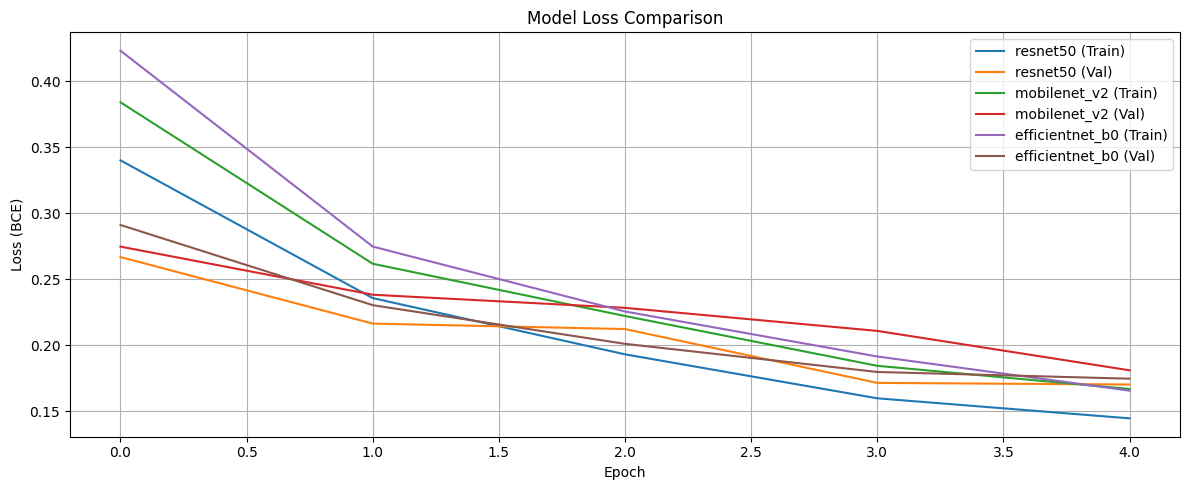

In [22]:
model_comparison.plot_results(results)

In [23]:
best_model = min(results.items(), key=lambda x: x[1]['best_val_loss'])

In [24]:
print(f"Best model: {best_model[0]} with validation loss: {best_model[1]['best_val_loss']:.4f}")

Best model: resnet50 with validation loss: 0.1701


### **From the result Above it is clear that resnet 50 performs better then all the other models combine so its time to hypertune it**